# Keras, overfitting, regularlization

- Part 3.1: Basic Keras
- Part 3.2: Regularization and overfitting

In [3]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tqdm.keras import TqdmCallback

## Exercises

### Part 3.1: Basic Keras

> **Ex. 3.1.1** Let's get started with Keras by examining the implementation of an actual neural network.
I have implemented a very simple `sequential` model to classify handwritten digits from the [mnist](https://keras.io/datasets/#mnist-database-of-handwritten-digits) data set.  Follow the code closely.  Make sure you understand it.  Use Keras documentation e.g. [First contact with Keras](https://keras.io/about/), [Dense Layer](https://keras.io/api/layers/core_layers/dense/), [Getting started with the Keras Sequential model](https://keras.io/getting-started/sequential-model-guide/).

In [4]:
#download the dataset
(x, y), _ = tensorflow.keras.datasets.mnist.load_data()

# Reshape each image to 1dim vector. Effectively, reshape
# `x_train` from (60000, 28, 28) to (60000, 28*28)
x_train = x[:50000].reshape(-1, 28*28)
x_test = x[50000:].reshape(-1, 28*28)

# Convert y_train from vector of labels to one-hot encoding vector
y = tensorflow.keras.utils.to_categorical(y, num_classes=10)
y_train = y[:50000]
y_test = y[50000:]

>In the following code cell, I construct the model.  Answer the following questions:
1. How many layers does the network have?
2. How many neurons in each layer ?
3. Why is the input dimension 784?  How did I come up with that number?
4. How many weights are there between each layer? (verify with ``model.summary()`` below)

1. 2 layers
2. layer_1: 20 nodes, layer_2: 10 nodes
3. flatten img of 28x28 into 1x784 or 784x1
4. Layer_1: (784*20)+20. Layer_2: 20*10+10

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation

#
model = Sequential()
model.add(Dense(20, input_dim=784, activation = 'relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])


In [6]:
# let's see what the model "looks" like
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [7]:
# fit the model to the training data
H = model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
391/391 [==============================] - 3s 3ms/step - loss: 0.1618 - accuracy: 0.1805
Epoch 2/5
391/391 [==============================] - 1s 3ms/step - loss: 0.1381 - accuracy: 0.3002
Epoch 3/5
391/391 [==============================] - 1s 3ms/step - loss: 0.1174 - accuracy: 0.4001
Epoch 4/5
391/391 [==============================] - 1s 3ms/step - loss: 0.0936 - accuracy: 0.5197
Epoch 5/5
391/391 [==============================] - 1s 3ms/step - loss: 0.0860 - accuracy: 0.5599


In [8]:
# evaluate the model on the test dataset
score = model.evaluate(x_test, y_test, batch_size=100)
print(score[0])
print(score[1])

100/100 [==============================] - 1s 3ms/step - loss: 0.0811 - accuracy: 0.5842
0.08113782107830048
0.5842000246047974


>What kind of scores did you obtain?  What do score[0] and score[1] represent?  

>How could the accuracy be improved?
1. First try to improve the performance by retraining the model for a longer time (i.e., higher number of epochs).  How much does the accuracy improve?
2. Then try to change the architecture of the network.  For example add more neurons to the exisiting layers; also add another layer of neurons.  Refit the data.  Does the performance increase?
3. **BONUS**. Can you score over 90% accuracy in just five training epochs? (Wait with this exercise, come back to this question when you're done with all the exercises)

> **Ex. 3.1.2** Solve exercises 1.2.2 and 1.2.3 from week 1 (producing the result plots), but solve them using Keras.
> Comment on differences in speed and outcome if you observe any.

What kind of scores did you obtain?  What do score[0] and score[1] represent? Results from score are loss & accuracy respectively

### Part 3.2: Overfitting and regularization

When a model *overfits* it means that it memorizes the outcomes for each training data point rather than general patterns.
Thus an overfitted model will score extremely well on the training data but poorly on new (unseen) data. 
In general, the more flexible a model is the easier it will overfit, and for this reason neural networks are notorious overfitters.
Broadly speaking, the way to combat this is to *regularize* the network.

> **Ex. 3.2.1** To understand overfitting, we will intentionally overfit some data! Let's fit a neural network to the following data.  

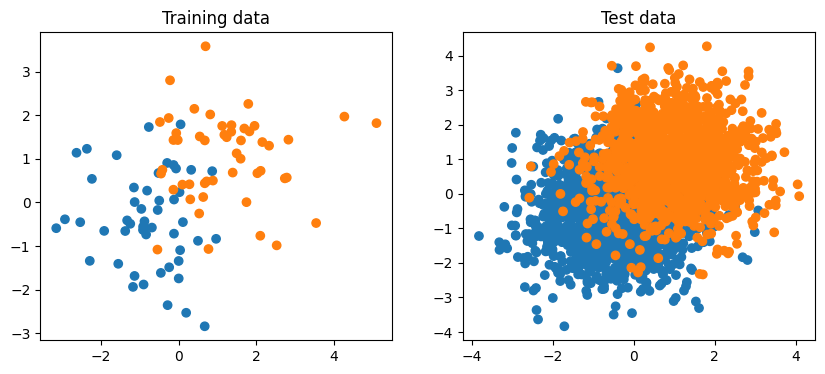

In [9]:
#code given in week1 exercise 1.2.2, slightly modified to have some crossover points

np.random.seed(2)
def generate_X_linear(N=200):
    X = np.vstack([
        np.random.normal([-0.5, -0.5], 1, size=(int(N/2), 2)),
        np.random.normal([1, 1], 1, size=(int(N/2), 2))
    ])

    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)
    
    return X, y

ntr=100
nts=3e3
x_train, y_train = generate_X_linear(N=ntr)
x_test, y_test = generate_X_linear(N=nts)

fig,ax = plt.subplots(1,2, figsize=[10,4])
ax[0].scatter(x_train[:,0],x_train[:,1],color=['C'+str(i) for i in y_train.ravel()])
ax[1].scatter(x_test[:,0],x_test[:,1],color=['C'+str(i) for i in y_test.ravel()])
ax[0].set_title('Training data'); ax[1].set_title('Test data');

> The theoretical optimal decision boundary here is a straight line, and since the clusters are overlapping there should be some error when fitting the model to the data. Try to reduce the error to 0 anyway (accuracy = 1) by adding layers of ``overfitter.add(Dense(200, activation = 'relu'))`` to the code below

In [10]:
overfitter = Sequential()
overfitter.add(Dense(200, input_dim=2, activation = 'relu'))
overfitter.add(Dense(1, activation='sigmoid'))

overfitter.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

# fit the model to the training data
history = overfitter.fit(x_train, y_train, epochs=300, batch_size=128, validation_data=[x_test, y_test], verbose=0, callbacks=[TqdmCallback(verbose=2)])

100%|██████████| 1.00/1.00 [00:00<00:00, 1.48batch/s, loss=0.687, accuracy=0.55]l_loss=0.686, val_accuracy=0.554]
100%|██████████| 1.00/1.00 [00:00<00:00, 9.96batch/s, loss=0.673, accuracy=0.58]
100%|██████████| 1.00/1.00 [00:00<00:00, 9.97batch/s, loss=0.66, accuracy=0.65]l_loss=0.663, val_accuracy=0.63]  
100%|██████████| 1.00/1.00 [00:00<00:00, 11.0batch/s, loss=0.647, accuracy=0.71]
100%|██████████| 1.00/1.00 [00:00<00:00, 10.9batch/s, loss=0.634, accuracy=0.75]l_loss=0.641, val_accuracy=0.712]
100%|██████████| 1.00/1.00 [00:00<00:00, 7.99batch/s, loss=0.621, accuracy=0.75]l_loss=0.631, val_accuracy=0.748]
100%|██████████| 1.00/1.00 [00:00<00:00, 9.18batch/s, loss=0.609, accuracy=0.78]l_loss=0.621, val_accuracy=0.768]
100%|██████████| 1.00/1.00 [00:00<00:00, 8.33batch/s, loss=0.598, accuracy=0.81]l_loss=0.611, val_accuracy=0.785]
100%|██████████| 1.00/1.00 [00:00<00:00, 8.82batch/s, loss=0.586, accuracy=0.82]l_loss=0.601, val_accuracy=0.796]
100%|██████████| 1.00/1.00 [00:00<00:00,

> When you get acc=1, plot the test data and colour it using the predictions of your neural network

94/94 [==============================] - 0s 1ms/step


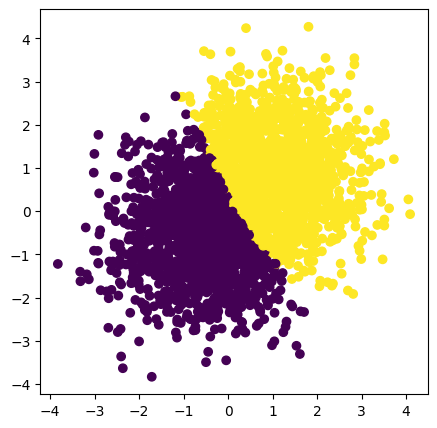

In [11]:
pred_class = overfitter.predict(x_test) > 0.5 # what does this line do?
fig,ax = plt.subplots(1, 1, figsize=[5,5])
ax.scatter(x_test[:,0], x_test[:,1], c=pred_class)

> Now plot the training and test loss as a function of number of epochs

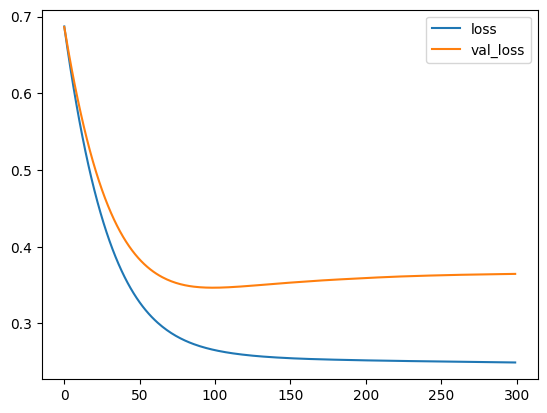

In [12]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

> **Ex 3.2.2** Norm regularization:
> 1. Apply L2 regularization to your network so that it cannot overfit. Read about regularization in Keras here: [Layer Weight Regularizers](https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/). When you add a new layer to your model, one of the parameters is `kernel_regularizer` -- this allows you to select a regularization technique (`l2` in our case), together with a hyperparameter for the regularization.
> 2. What does L2 regularization do? Compare the absolute size of weights in the unregularized and regularized model.
>
> *Hint:* `model.weights` will give you a list of weights and bias arrays for each layer. They are in a Tensorflow format but you can call `.numpy()` on them to get them out as numpy arrays.

In [13]:
overfitter_regularized = Sequential()
overfitter_regularized.add(Dense(200, input_dim=2, activation = 'relu', kernel_regularizer=l1_l2(l1=0.05, l2=0.05)))
overfitter_regularized.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(.02)))

overfitter_regularized.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

# fit the model to the training data
history_regularized = overfitter_regularized.fit(x_train, y_train, epochs=300, batch_size=128, validation_data=[x_test, y_test], verbose=0, callbacks=[TqdmCallback(verbose=2)])

100%|██████████| 1.00/1.00 [00:00<00:00, 1.24batch/s, loss=2.69, accuracy=0.51]l_loss=2.67, val_accuracy=0.603]
100%|██████████| 1.00/1.00 [00:00<00:00, 7.81batch/s, loss=2.66, accuracy=0.68]l_loss=2.64, val_accuracy=0.625]
100%|██████████| 1.00/1.00 [00:00<00:00, 8.33batch/s, loss=2.63, accuracy=0.71]l_loss=2.61, val_accuracy=0.639]
100%|██████████| 1.00/1.00 [00:00<00:00, 10.4batch/s, loss=2.6, accuracy=0.73]l_loss=2.58, val_accuracy=0.649] 
100%|██████████| 1.00/1.00 [00:00<00:00, 9.62batch/s, loss=2.57, accuracy=0.74]l_loss=2.55, val_accuracy=0.656]
100%|██████████| 1.00/1.00 [00:00<00:00, 9.38batch/s, loss=2.54, accuracy=0.75]l_loss=2.52, val_accuracy=0.665]
100%|██████████| 1.00/1.00 [00:00<00:00, 6.29batch/s, loss=2.51, accuracy=0.75]l_loss=2.49, val_accuracy=0.673]
100%|██████████| 1.00/1.00 [00:00<00:00, 7.52batch/s, loss=2.48, accuracy=0.75]l_loss=2.47, val_accuracy=0.683]
100%|██████████| 1.00/1.00 [00:00<00:00, 8.03batch/s, loss=2.45, accuracy=0.76]l_loss=2.44, val_accuracy

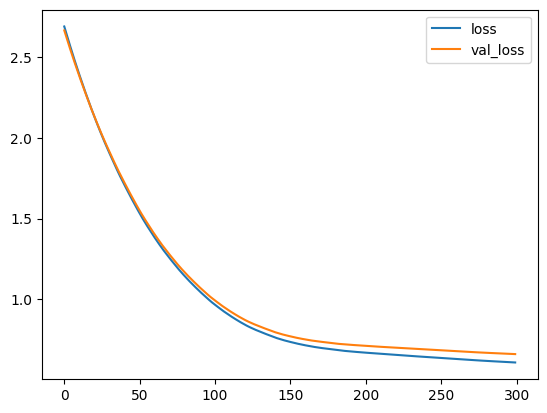

In [14]:
plt.plot(history_regularized.history['loss'], label='loss')
plt.plot(history_regularized.history['val_loss'], label='val_loss')
plt.legend()

> **Ex 3.2.3** Early stopping: Often we like to monitor the model's performance on a test set also while we train the model.
This allows us to do something called "early stopping" which is a way of regularizing by stopping the training process before the network overfits (we know it overfits when the performance on the training set starts getting much better than on the test set).
Implement early stopping when training on the random data above. What accuracy do you get?
>
> *Hint*: There's an example [here](https://keras.io/getting-started/faq/#how-can-i-interrupt-training-when-the-validation-loss-isnt-decreasing-anymore) and a more complete explanation [here](https://keras.io/api/callbacks/early_stopping/).

> **Ex 3.2.4** Dropout: Another clever way to regularize a network, is to randomly "drop out" some fraction of neurons during each training batch, so the network cannot store memory in specific neurons. The method is called Dropout. Go ahead and take your overfitting model and apply dropout in one or more of the layers and comment on the performance.
>
> *Hint*: Check out the reference [here](https://keras.io/api/layers/regularization_layers/dropout/).